<a href="https://colab.research.google.com/github/webvic/Ingate_SEO_n/blob/main/Victor_Shchebletsov/_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%BE%D0%BC%D0%BC%D0%B5%D1%80%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D1%81%D1%82%D0%B8_%D0%B7%D0%B0%D0%BF%D1%80%D0%BE%D1%81%D0%B0_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%7C_%D0%94%D0%97_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дорогой куратор!

Я на свой страх и риск заменил стандартную домашнюю работу на реальную из моей стажировки. Надеюсь, она будет принята. если нет, я сделаю еще и стандартную домашку

===========================================================

В данном домашнем задании предоставляется возможность поработать с задачей по распознаванию позитивных и негативных отзывы людей по автомобилю Tesla. База для обучения содержит два текстовых файла с рядом строчных отзывов с мнением людей об автомобиле Tesla, соответственно негативного и позитивного содержания. Ссылка на скачивание базы уже включена в ноутбук задания.


Необходимо выполнить следующие действия:

  1. Загрузите саму базу по ссылке и подговьте файлы базы для обработки.
  2. Создайте обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети в 85-90% на проверочной выборке.
   


**Импорт библиотек, загрузка базы и подготовка её к предобработке.**

In [11]:
# Работа с массивами данных
import numpy as np

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Загрузка датасетов из облака google
import gdown

# Для работы с файлами в Colaboratory
import os

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

**Загрузка текста из файлов, преобразование в одну строку. Разделение на обучающую и тестовую**

In [25]:
import pandas as pd
import glob
import re
import numpy as np

folder_for_csv_files='/content/'
csv_file_pattern='*.csv'

print(folder_for_csv_files + csv_file_pattern)

csv_file_list = glob.glob(folder_for_csv_files + csv_file_pattern)

print(csv_file_list)

CLASS_LIST = ["Некоммерческий запрос", "Нейтральный запрос", "Коммерческий запрос"]
CLASS_NUM=len(CLASS_LIST)

lists_of_phrases=[[],[],[]]

print(csv_file_list)

for file_path in csv_file_list:
    data = pd.read_csv(file_path)
    data['Коммерция код'] = data['Коммерция код'].add(1)
    for i,cls in enumerate(CLASS_LIST):
      filtered_data = data[data['Коммерция код']==i ]
      lists_of_phrases[i] += filtered_data['Поисковый запрос'].tolist()

train_text=[[],[],[]]
test_text=[[],[],[]]
for cls in range(CLASS_NUM): #разбиваем выборку на обучающую и тестовую
    split_index=len(lists_of_phrases[cls])*4//5
    train_text[cls]=lists_of_phrases[cls][:split_index]
    test_text[cls]=lists_of_phrases[cls][split_index:]
    print('Обучающая', CLASS_LIST[cls], len(train_text[cls]),train_text[cls][:10])
    print('Тестовая', CLASS_LIST[cls], len(test_text[cls]),test_text[cls][:10])

text_train=[]
text_test=[]
for cls in range(CLASS_NUM): #сливаем ключевые вразы в один текст
    text_train.append(' '.join(train_text[cls]))
    text_test.append(' '.join(test_text[cls]))
    print("Обучающая:",CLASS_LIST[cls],"Количество слов:",len(text_train[cls]),text_train[cls][:100])
    print("Тестовая:",CLASS_LIST[cls],"Количество слов:",len(text_test[cls]),text_test[cls][:100])

/content/*.csv
['/content/Размеченный датасет - 2023-12-05_11-0-14.csv', '/content/Размеченный датасет  - 2.csv']
['/content/Размеченный датасет - 2023-12-05_11-0-14.csv', '/content/Размеченный датасет  - 2.csv']
Обучающая Некоммерческий запрос 7364 ['покупка опционов', 'почему икаю', 'якорь своими руками', 'покупка флориды', 'терабайт сколько', 'почему лор', 'как сделать крахмал', 'троя смотреть', 'водитель курьер', 'гдз по английскому 6 класс']
Тестовая Некоммерческий запрос 1842 ['crack cs6', 'почему руки', 'что такое рнк', 'почему слитно', 'гдз по алгебре 8 класс', 'электромонтажник', 'nas своими руками', 'а зори здесь тихие фильм', 'что такое истина', 'охранник без лицензии']
Обучающая Нейтральный запрос 1914 ['лечение ногтей', 'починить диммер', 'father запчасти', 'калиста опт', 'покупки акций', 'начальник транспортного отдела', 'либерти запчасти', 'сиделка', 'форма заказать услугу', 'таблетки для котят']
Тестовая Нейтральный запрос 479 ['mercedes e class coupe amg', 'ремонт dyso

# Токенизация и преобразование в список индексов

In [13]:
# Работа со временем
import time

# Задание параметров преобразования
VOCAB_SIZE = 10000                        # Объем словаря для токенизатора
WIN_SIZE   = 10                         # Длина отрезка текста (окна) в словах
WIN_HOP    = 5                          # Шаг окна разбиения текста на векторы

# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                          lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

Время обработки: 0.16 с


In [14]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items))

[('неизвестное_слово', 1), ('купить', 2), ('как', 3), ('где', 4), ('в', 5), ('заказать', 6), ('услуги', 7), ('аренда', 8), ('продажа', 9), ('руками', 10), ('своими', 11), ('сколько', 12), ('цена', 13), ('сделать', 14), ('почему', 15), ('прайс', 16), ('изготовление', 17), ('что', 18), ('такое', 19), ('запчасти', 20), ('лист', 21), ('ремонт', 22), ('обзор', 23), ('для', 24), ('бывают', 25), ('какие', 26), ('сравнение', 27), ('починить', 28), ('покупка', 29), ('недорого', 30), ('скидки', 31), ('на', 32), ('оптом', 33), ('смотреть', 34), ('участок', 35), ('фильм', 36), ('москве', 37), ('мерседес', 38), ('опт', 39), ('участки', 40), ('вакансия', 41), ('с', 42), ('услугу', 43), ('класса', 44), ('москва', 45), ('подмосковье', 46), ('фриланс', 47), ('фрилансер', 48), ('скидка', 49), ('чеховский', 50), ('недорогие', 51), ('работа', 52), ('покупки', 53), ('квартиры', 54), ('по', 55), ('район', 56), ('бизнес', 57), ('без', 58), ('недвижимость', 59), ('апартаменты', 60), ('класс', 61), ('вакансии'

In [15]:
# Проверка индекса слова в словаре
try:
    print('Интересующее слово имеет индекс:', tokenizer.word_index[input('Введите слово: ')])
except:
    print('Интересующего вас слова нет в словаре')

Введите слово: макароны
Интересующее слово имеет индекс: 842


In [16]:
# Преобразование обучающих и проверочных текстов в последовательность индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    print("Фрагмент обучающего текста:")
    print("В виде оригинального текста:              ", text_train[1][:101])
    print("Он же в виде последовательности индексов: ", seq_train[1][:20])

Фрагмент обучающего текста:
В виде оригинального текста:               лечение ногтей починить диммер father запчасти калиста опт покупки акций начальник транспортного отде
Он же в виде последовательности индексов:  [817, 162, 28, 7744, 7745, 20, 7746, 39, 53, 774, 327, 2017, 566, 7747, 20, 2575, 1287, 6, 43, 1341]
Время обработки: 0.08 с


In [17]:
# Функция вывода статистики по текстам
def print_text_stats(title, texts, sequences, class_labels=CLASS_LIST):
    # Суммарное количество символов и слов в тексте
    chars = 0
    words = 0

    print(f'Статистика по {title} текстам:')

    # Вывод итогов по всем классам данного набора текстов и их последовательностей индексов
    for cls in range(len(class_labels)):
        print('{:<15} {:9} символов,{:8} слов'.format(class_labels[cls],
                                                      len(texts[cls]),
                                                      len(sequences[cls])))
        chars += len(texts[cls])
        words += len(sequences[cls])

    print('----')
    print('{:<15} {:9} символов,{:8} слов\n'.format('В сумме', chars, words))

# Вывод итогов по текстам
print_text_stats('обучающим', text_train, seq_train)
print_text_stats('тестовым', text_test, seq_test)

Статистика по обучающим текстам:
Некоммерческий запрос    132864 символов,   18581 слов
Нейтральный запрос     35648 символов,    4677 слов
Коммерческий запрос    138186 символов,   18223 слов
----
В сумме            306698 символов,   41481 слов

Статистика по тестовым текстам:
Некоммерческий запрос     33325 символов,    4664 слов
Нейтральный запрос      9008 символов,    1177 слов
Коммерческий запрос     34468 символов,    4552 слов
----
В сумме             76801 символов,   10393 слов



In [18]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [19]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

(8292, 10) (8292, 3)
(2074, 10) (2074, 3)
Время обработки: 0.03 с


In [20]:
# Вывод отрезка индексов тренировочной выборки
print(x_train[0],y_train[0])

[  29  560   15 3263 3264   11   10   29 3265 3266] [1. 0. 0.]


In [21]:
# Формирование выборок текстов в виде разреженных матриц (bag of words)
with timex():
    # На входе .sequences_to_matrix() ожидает список, .tolist() выполняет преобразование типа
    x_train_01 = tokenizer.sequences_to_matrix(x_train.tolist())
    x_test_01 = tokenizer.sequences_to_matrix(x_test.tolist())

    # Вывод формы обучающей выборки в виде разреженной матрицы Bag of Words
    print(x_train_01.shape)
    # Вывод фрагмента отрезка обучающего текста в виде Bag of Words
    print(x_train_01[0][0:100])

(8292, 10000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Время обработки: 0.19 с


In [22]:
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Создаем обратный вызов ModelCheckpoint
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        callbacks=[checkpoint, early_stopping ])

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2000200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 batch_normalization (Batch  (None, 200)               800       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 2001603 (7.64 MB)
Trainable params: 2001203 (7.63 MB)
Non-trainable params: 400 (1.56 KB)
_________________________________________________________________
Epoch 1/50
52/52 [==============================] - 9s 141ms/step - loss: 0.2681 - a

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 3s 59ms/step - loss: 0.0161 - accuracy: 0.9980 - val_loss: 0.6408 - val_accuracy: 0.9849
Epoch 3/50
 1/52 [..............................] - ETA: 2s - loss: 0.0031 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 6s 113ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.4998 - val_accuracy: 0.9885
Epoch 4/50
 2/52 [>.............................] - ETA: 2s - loss: 0.0024 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 7s 129ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3721 - val_accuracy: 0.9916
Epoch 5/50
 1/52 [..............................] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 6s 123ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2607 - val_accuracy: 0.9916
Epoch 6/50
 1/52 [..............................] - ETA: 2s - loss: 0.0025 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 4s 71ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 0.9928
Epoch 7/50
 2/52 [>.............................] - ETA: 2s - loss: 7.0807e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 3s 61ms/step - loss: 6.7184e-04 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 0.9922
Epoch 8/50
 1/52 [..............................] - ETA: 2s - loss: 3.5936e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 6s 115ms/step - loss: 5.3880e-04 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9922
Epoch 9/50
 4/52 [=>............................] - ETA: 2s - loss: 6.6423e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 4s 75ms/step - loss: 4.8266e-04 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 0.9910
Epoch 10/50
 2/52 [>.............................] - ETA: 2s - loss: 3.1962e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 4s 80ms/step - loss: 4.1298e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9892


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 11/50
52/52 [==============================] - 4s 84ms/step - loss: 3.1077e-04 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 12/50
 1/52 [..............................] - ETA: 2s - loss: 2.0953e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 6s 107ms/step - loss: 2.7349e-04 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 13/50
 3/52 [>.............................] - ETA: 2s - loss: 2.1093e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 5s 96ms/step - loss: 2.4441e-04 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9898
Epoch 14/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 6s 104ms/step - loss: 2.6190e-04 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9898
Epoch 15/50
 1/52 [..............................] - ETA: 2s - loss: 8.4909e-05 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 4s 85ms/step - loss: 1.9934e-04 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 0.9885
Epoch 16/50
 3/52 [>.............................] - ETA: 2s - loss: 2.2551e-04 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/52 [==============================] - 4s 78ms/step - loss: 1.9668e-04 - accuracy: 1.0000 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 17/50
52/52 [==============================] - 3s 58ms/step - loss: 1.6675e-04 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9885
Epoch 18/50
52/52 [==============================] - 6s 124ms/step - loss: 1.3305e-04 - accuracy: 1.0000 - val_loss: 0.0339 - val_accuracy: 0.9879
Epoch 19/50
52/52 [==============================] - 5s 89ms/step - loss: 1.1729e-04 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9867
Epoch 20/50
52/52 [==============================] - 5s 105ms/step - loss: 1.0470e-04 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 0.9879


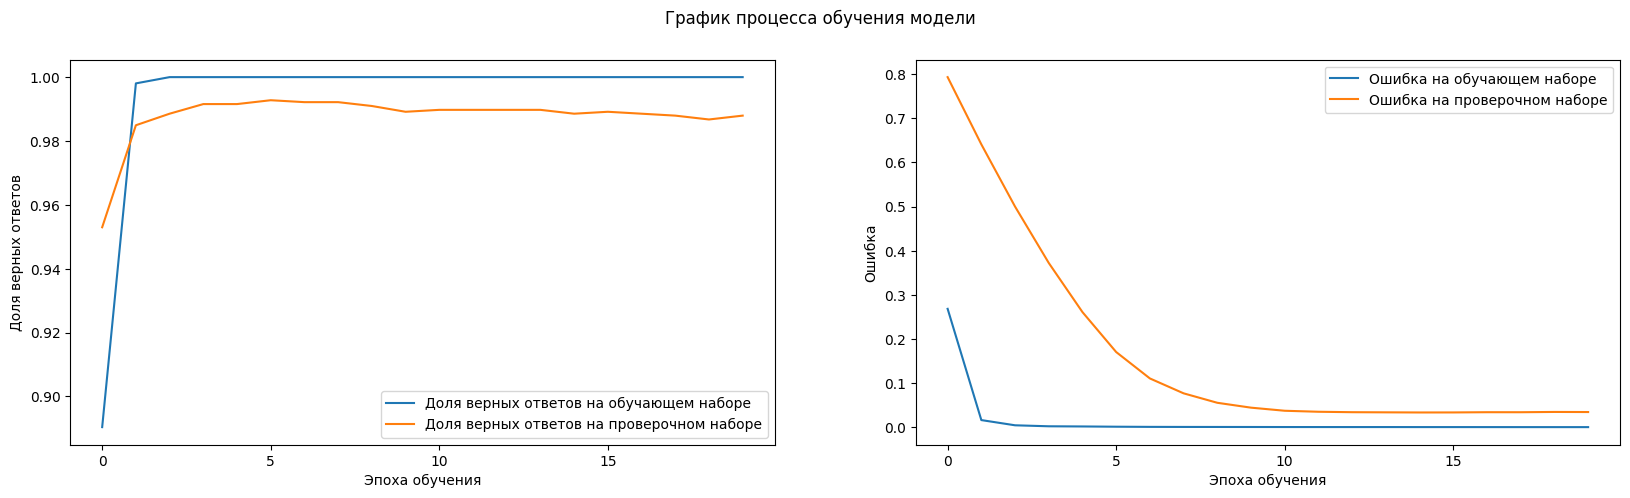

65/65 [==============================] - 1s 17ms/step


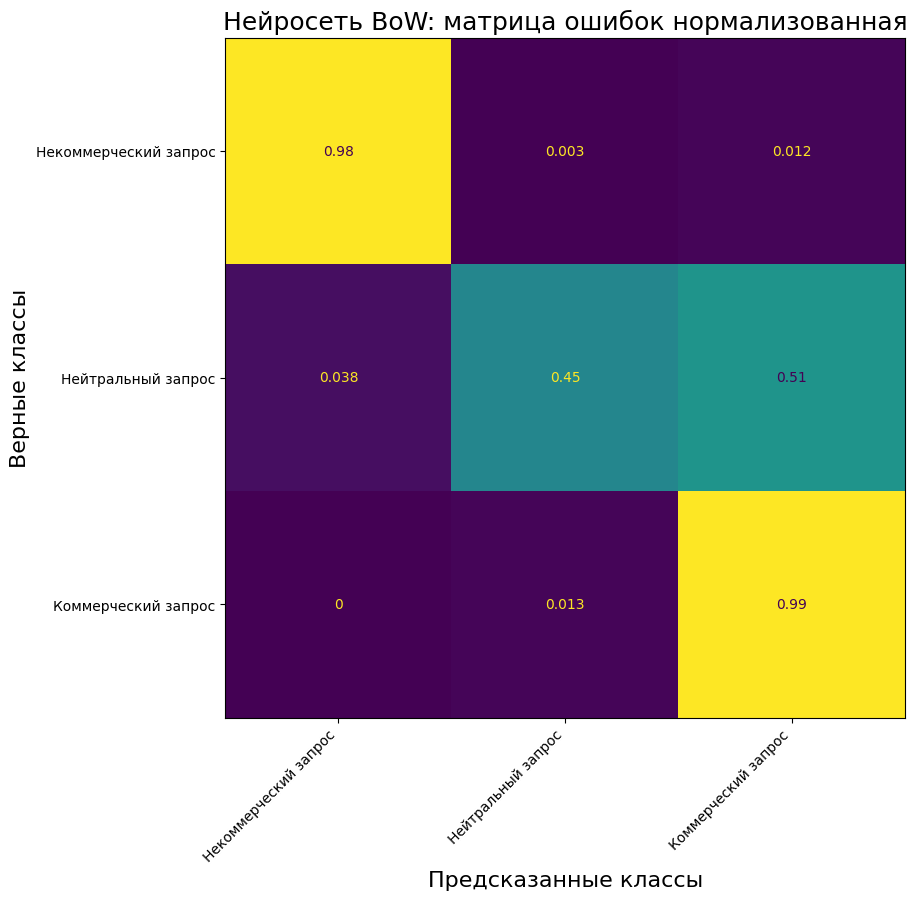

----------------------------------------------------------------------------------------------------
Нейросеть: BoW
Класс: Некоммерческий запрос  98% сеть отнесла к классу Некоммерческий запрос - ВЕРНО :-)
Класс: Нейтральный запрос    51% сеть отнесла к классу Коммерческий запрос  - НЕВЕРНО :-(
Класс: Коммерческий запрос   99% сеть отнесла к классу Коммерческий запрос  - ВЕРНО :-)

Средняя точность распознавания:  81%


In [23]:
# Создание последовательной модели нейросети
model_text_bow_softmax = Sequential()
# Первый полносвязный слой
model_text_bow_softmax.add(Dense(200, input_dim=VOCAB_SIZE, activation="relu"))
# Слой регуляризации Dropout
model_text_bow_softmax.add(Dropout(0.25))
# Слой пакетной нормализации
model_text_bow_softmax.add(BatchNormalization())
# Выходной полносвязный слой
model_text_bow_softmax.add(Dense(CLASS_NUM, activation='softmax'))

# Входные данные подаются в виде векторов bag of words
compile_train_eval_model(model_text_bow_softmax,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         class_labels=CLASS_LIST,
                         title='BoW')